# **1- Starting Part - Fix**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd

path = "/content/drive/MyDrive/RAPGAN/csv output/total/"
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']

print(files_csv)

df = pd.DataFrame()

for f in files_csv:
    fp = path+f
    data = pd.read_csv(fp)
    data.columns =  ["time_motion", "X_motion", "Y_motion", "QoM_motion", "beat_sound"]
    df = df.append(data)

df.columns = ["time_motion", "X_motion", "Y_motion", "QoM_motion", "beat_sound"]

X = df[["time_motion", "X_motion", "Y_motion", "QoM_motion"]]
y = df[['beat_sound']]

['Vid_42_Arioso_tpt_tpt_hn_tbn_tba.csv', 'Vid_41_Miserere_fl_fl_ob_sax_bn.csv', 'Vid_40_Miserere_fl_fl_ob_cl_bn.csv', 'Vid_39_Jerusalem_vn_vn_va_sax_db.csv', 'Vid_43_Chorale_tpt_tpt_hn_tbn_tba.csv', 'Vid_38_Jerusalem_vn_vn_va_vc_db.csv', 'Vid_44_K515_vn_vn_va_va_vc.csv', 'Vid_09_Jesus_tpt_vn.csv', 'Vid_37_Rondeau_fl_vn_va_cl.csv', 'Vid_13_Hark_vn_vn_va.csv', 'Vid_36_Rondeau_vn_vn_va_vc.csv', 'Vid_32_Fugue_vn_vn_va_vc.csv', 'Vid_31_Slavonic_tpt_tpt_hn_tbn.csv', 'Vid_07_GString_tpt_tbn.csv', 'Vid_30_Fugue_fl_fl_ob_sax.csv', 'Vid_02_Sonata_vn_vn.csv', 'Vid_03_Dance_fl_cl.csv', 'Vid_29_Fugue_fl_fl_ob_cl.csv', 'Vid_04_Allegro_fl_fl.csv', 'Vid_28_Fugue_fl_ob_cl_bn.csv', 'Vid_05_Entertainer_tpt_tpt.csv', 'Vid_34_Fugue_tpt_tpt_hn_tbn.csv', 'Vid_27_King_vn_vn_va_sax.csv', 'Vid_26_King_vn_vn_va_vc.csv', 'Vid_35_Rondeau_vn_vn_va_db.csv', 'Vid_33_Elise_tpt_tpt_hn_tbn.csv', 'Vid_21_Rejouissance_cl_tbn_tba.csv', 'Vid_18_Nocturne_vn_fl_tpt.csv', 'Vid_24_Pirates_vn_vn_va_vc.csv', 'Vid_23_Rejouissance_

In [8]:
df.to_csv("/content/drive/MyDrive/RAPGAN/df.csv")

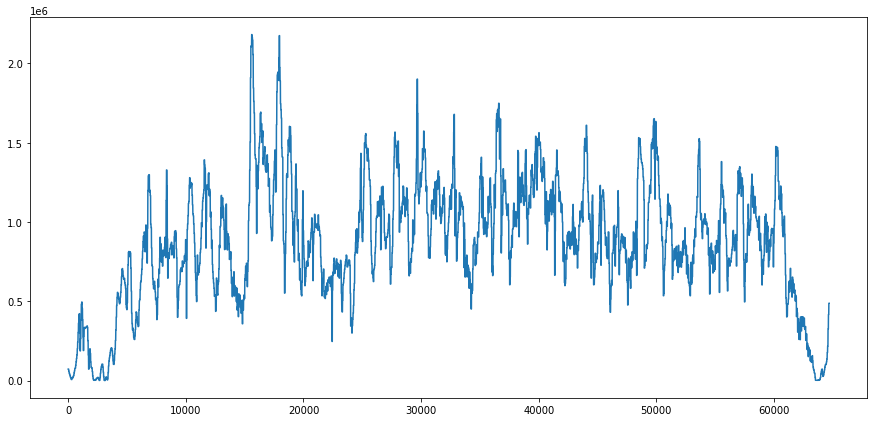

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

df=pd.read_csv('/content/drive/MyDrive/RAPGAN/csv output/total/Vid_01_Jupiter_vn_vc.csv')


plt.rcParams['figure.figsize'] = [15,7]
QoM = df[["QoM_motion"]]

plt.plot(QoM)
plt.show()


In [21]:
X.head(10)

,time_motion,X_motion,Y_motion,QoM_motion
0,0,0.708849,0.318052,159377.0
1,1,0.728374,0.305667,162063.0
2,2,0.728374,0.305667,162063.0
3,3,0.728374,0.305667,162063.0
4,4,0.728374,0.305667,162063.0
5,5,0.728374,0.305667,162063.0
6,6,0.728374,0.305667,162063.0
7,7,0.728374,0.305667,162063.0
8,8,0.728374,0.305667,162063.0
9,9,0.728374,0.305667,162063.0


In [22]:
y.head(10)

,beat_sound
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [23]:
# Check missing values
print('\nMissing values - X:\n')
print(X.isnull().sum())
print('\nMissing values - y:\n')
print(y.isnull().sum())


Missing values - X:

time_motion    0
X_motion       0
Y_motion       0
QoM_motion     0
dtype: int64

Missing values - y:

beat_sound    0
dtype: int64


In [24]:
# Checking for nan values
print("Number of NaN values in train data is "+str(X.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(y.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [1]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

# define problem properties
n_timesteps = 40
# define LSTM
model = Sequential()
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=20, batch_size=3, verbose=2)
 
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Streaming output truncated to the last 5000 lines.
1/1 - 0s - loss: 0.0490 - accuracy: 0.9750
Epoch 3/20
1/1 - 0s - loss: 0.0480 - accuracy: 0.9750
Epoch 4/20
1/1 - 0s - loss: 0.0461 - accuracy: 0.9750
Epoch 5/20
1/1 - 0s - loss: 0.0435 - accuracy: 0.9750
Epoch 6/20
1/1 - 0s - loss: 0.0405 - accuracy: 0.9750
Epoch 7/20
1/1 - 0s - loss: 0.0372 - accuracy: 0.9750
Epoch 8/20
1/1 - 0s - loss: 0.0337 - accuracy: 0.9750
Epoch 9/20
1/1 - 0s - loss: 0.0303 - accuracy: 0.9750
Epoch 10/20
1/1 - 0s - loss: 0.0271 - accuracy: 0.9750
Epoch 11/20
1/1 - 0s - loss: 0.0242 - accuracy: 0.9750
Epoch 12/20
1/1 - 0s - loss: 0.0216 - accuracy: 1.0000
Epoch 13/20
1/1 - 0s - loss: 0.0194 - accuracy: 1.0000
Epoch 14/20
1/1 - 0s - loss: 0.0175 - accuracy: 1.0000
Epoch 15/20
1/1 - 0s - loss: 0.0161 - accuracy: 1.0000
Epoch 16/20
1/1 - 0s - loss: 0.0150 - accuracy: 1.0000
Epoch 17/20
1/1 - 0s - loss: 0.0141 - accuracy: 1.0000
Epoch 18/20
1/1 - 0s - loss: 0.0136 - accuracy: 1.0000
Epoch 19/20
1/1 - 0s - loss: 0.01

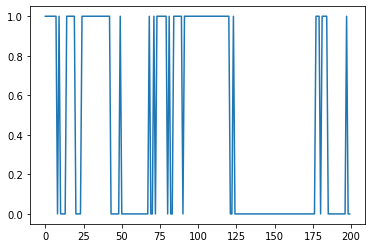

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [20]:
import matplotlib.pyplot as plt
a=yhat[0,:]
plt.plot(a[:200])
plt.show()
a

# **Dealing with Imbalanced data -1 - analyzing data**

https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/imbalance_class_undersampling_oversampling_updated.ipynb

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [35]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [36]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [37]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [38]:
df = pd.read_csv('/content/drive/MyDrive/RAPGAN/csv output/total/Vid_01_Jupiter_vn_vc.csv')

df.head()

,time_motion,X_motion,Y_motion,QoM_motion,beat_sound
0,1,0.330721,0.445477,72119,1
1,2,0.330721,0.445477,72119,0
2,3,0.330721,0.445477,72119,0
3,4,0.330721,0.445477,72119,0
4,5,0.330721,0.445477,72119,0


In [39]:
target = 'beat_sound'

In [40]:
X = df.loc[:, df.columns!=target]

In [41]:
Y = df.loc[:, df.columns==target]

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

0    64564
1      126
Name: beat_sound, dtype: int64


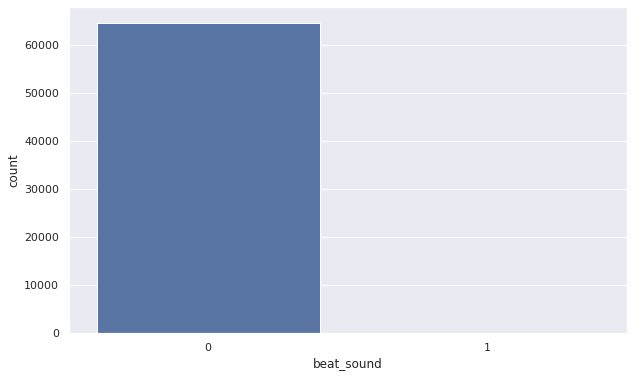

In [43]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

In [44]:
print(100* ( 126/float(df.shape[0]))) # for 1 values percantage 

print(100* (64564/float(df.shape[0]))) #for 0 values percantage

0.19477508115628384
99.80522491884372


In [45]:
Y_train[target].value_counts()

0    43258
1       84
Name: beat_sound, dtype: int64

In [ ]:
clf = LogisticRegression().fit(X_train, Y_train)

In [ ]:
Y_Test_Pred = clf.predict(X_test)

In [ ]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,21306,42


In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9980326025857224
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


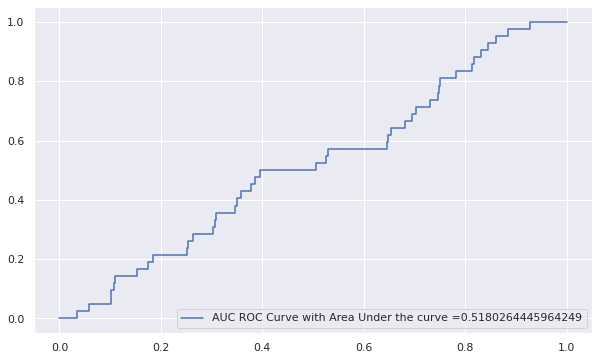

In [ ]:
generate_auc_roc_curve(clf, X_test)

# **https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets**

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

IndexError: ignored

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

Removed indexes: [4195559 3869134 3916776 ... 4962406 4962894 4963358]


IndexError: ignored

Removed indexes: [      0       1       2 ... 4970181 4970182 4970183]


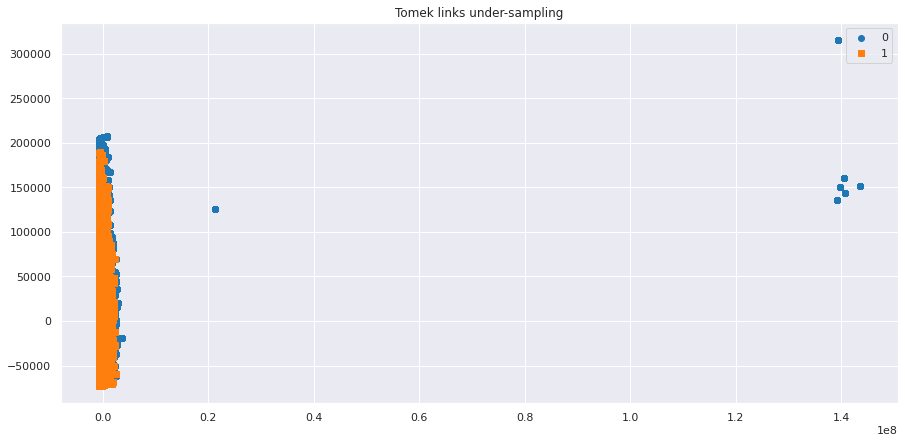

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

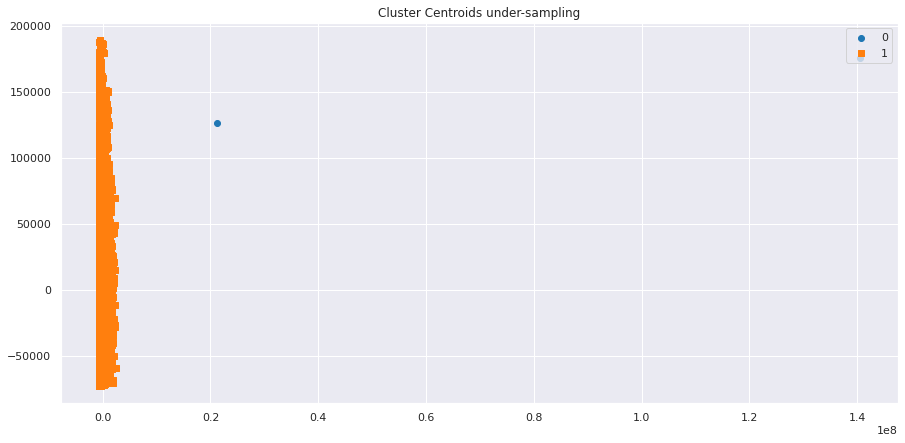

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

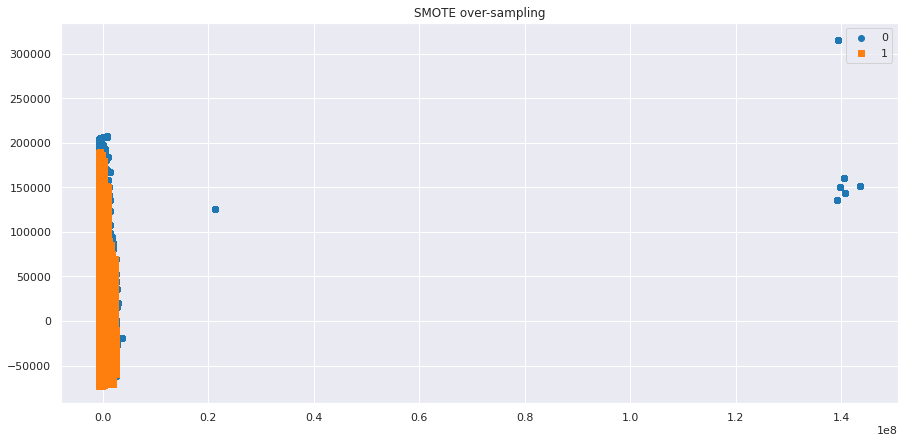

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

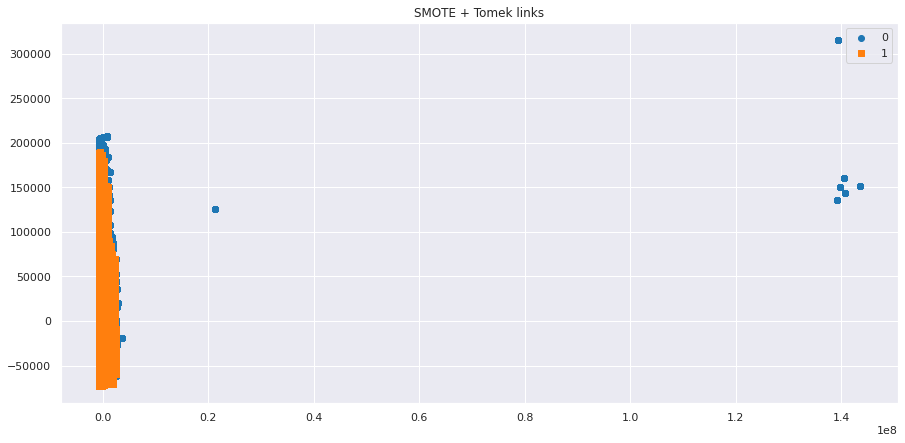

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

# **Dealing with Imbalanced data -2 - class_weight='balanced'**

https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/imbalance_class_undersampling_oversampling_updated.ipynb

In [ ]:
unique_classes = list(df[target].unique())
unique_classes

[1, 0]

In [ ]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])*len(unique_classes))

out_dict

{0: 0.5009757759742272, 1: 256.7063492063492}

In [ ]:
print (X_train.shape, Y_train.shape)

(43342, 4) (43342, 1)


In [ ]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

In [ ]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

array([  0.50097092, 257.98809524])

In [ ]:
Y_Test_Pred = clf.predict(X_test)

In [ ]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,10846,20
1,10460,22


In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.5090875023421397
Precision =  0.0020988360999809196
Recall =  0.5238095238095238
F1 Score =  0.004180919802356518


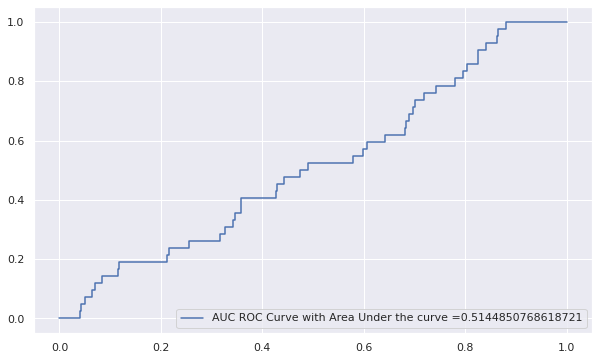

In [ ]:
generate_auc_roc_curve(clf, X_test)

In [ ]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(estimator=LogisticRegression(),param_grid={'class_weight': [{0: x, 1: 1.0-x} for x in weights]},
    scoring='f1',cv=5)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.05, 1: 0.95}}


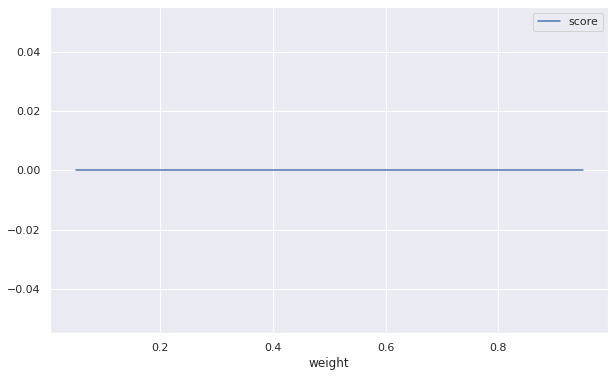

In [ ]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],'weight': weights })
data_out.plot(x='weight')

In [ ]:
data_out

,score,weight
0,0.0,0.050000
1,0.0,0.097368
2,0.0,0.144737
3,0.0,0.192105
4,0.0,0.239474
5,0.0,0.286842
6,0.0,0.334211
7,0.0,0.381579
8,0.0,0.428947
9,0.0,0.476316


In [ ]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [ ]:
Y_Test_Pred = clf.predict(X_test)

In [ ]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,21306,42


In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9980326025857224
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


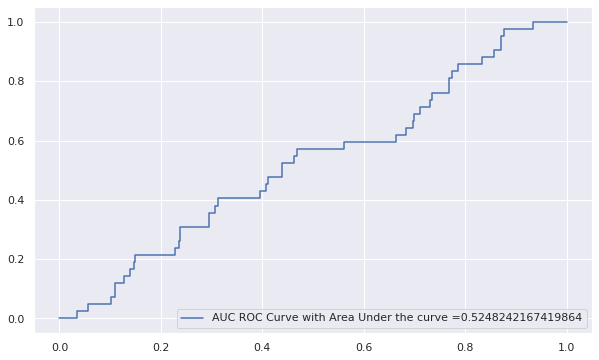

In [ ]:
generate_auc_roc_curve(clf, X_test)

# **Dealing with Imbalanced data -2 - SMOTE**


In [27]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

NameError: ignored

In [ ]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [ ]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 43258, 1: 43258}

In [ ]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

In [ ]:
Y_Test_Pred = clf.predict(X_test)

In [ ]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,10956,21
1,10350,21


In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.5141933670601462
Precision =  0.00202487706103558
Recall =  0.5
F1 Score =  0.0040334197637568415


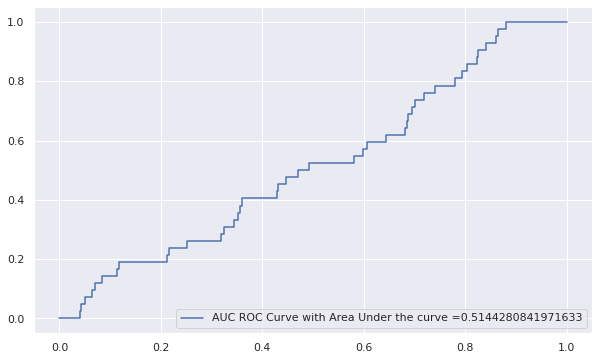

In [ ]:
generate_auc_roc_curve(clf, X_test)

In [ ]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

Best parameters : {'smote__ratio': 0.005}


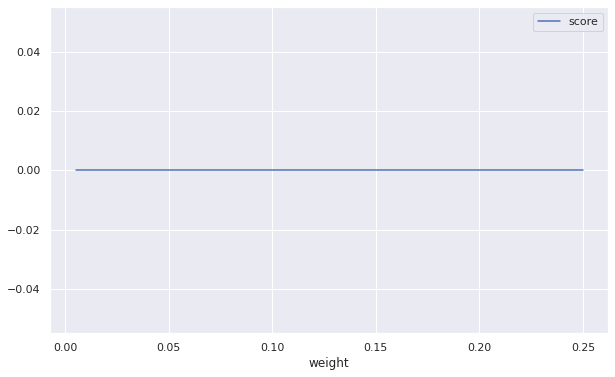

In [ ]:
pipe = make_pipeline(SMOTE(), LogisticRegression())

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV( estimator=pipe, param_grid={'smote__ratio': weights}, scoring='f1', cv=3)

grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'], 'weight': weights })
weight_f1_score_df.plot(x='weight')


In [ ]:
pipe = make_pipeline(SMOTE(ratio=0.005),LogisticRegression())

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [ ]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,21306,42


In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9980326025857224
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


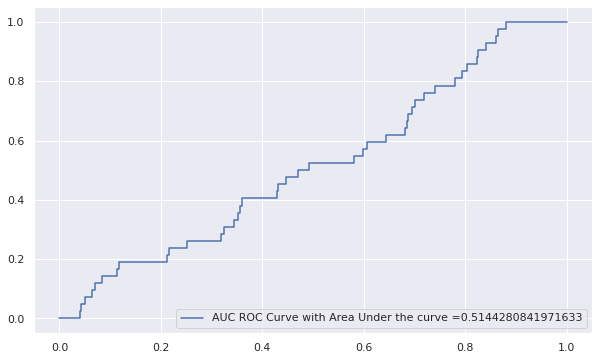

In [ ]:
generate_auc_roc_curve(clf, X_test)

# **Dealing with Imbalanced data -2 - undersampling**


In [ ]:
minority_class_len = len(df[df[target] == 1])
print(minority_class_len)

126


In [ ]:
majority_class_indices = df[df[target] == 0].index
print(majority_class_indices)

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            64680, 64681, 64682, 64683, 64684, 64685, 64686, 64687, 64688,
            64689],
           dtype='int64', length=64564)


In [ ]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))

126


In [ ]:
minority_class_indices = df[df[target] == 1].index
print(minority_class_indices)

Int64Index([    0,    93,   557,  1022,  1486,  1950,  2415,  2902,  3390,
             3878,
            ...
            53685, 54102, 54567, 55031, 55449, 55890, 56401, 56912, 57400,
            57864],
           dtype='int64', length=126)


In [ ]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample = df.loc[under_sample_indices]

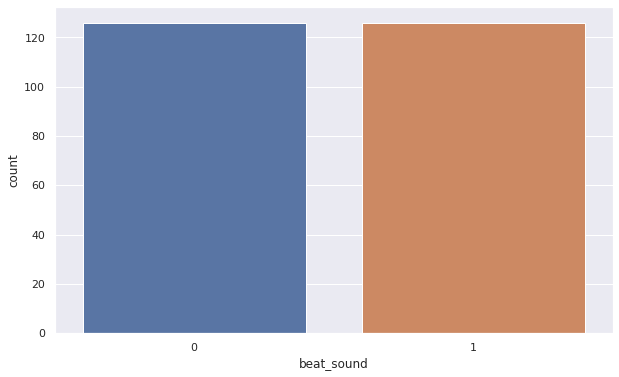

In [ ]:
sns.countplot(x=target, data=under_sample)

In [ ]:
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.5357142857142857
Precision =  0.5365853658536586
Recall =  0.5238095238095238
F1 Score =  0.5301204819277109


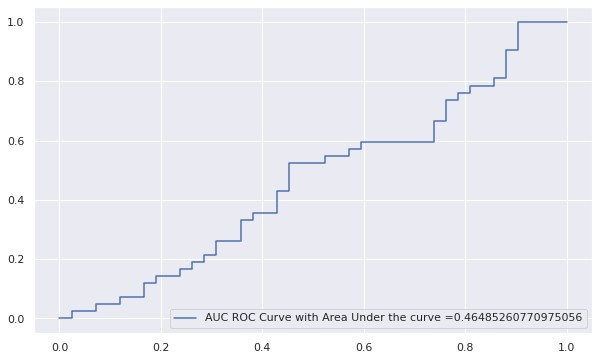

In [ ]:
generate_auc_roc_curve(clf, X_test)

# **2- Dataset Split & Preprocessing**

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42 , shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


Feature Variance:

[6.56935960e-01 3.16894207e-01 2.55554867e-02 6.14346156e-04]

Cumulative Feature Variance:

[0.65693596 0.97383017 0.99938565 1.        ]


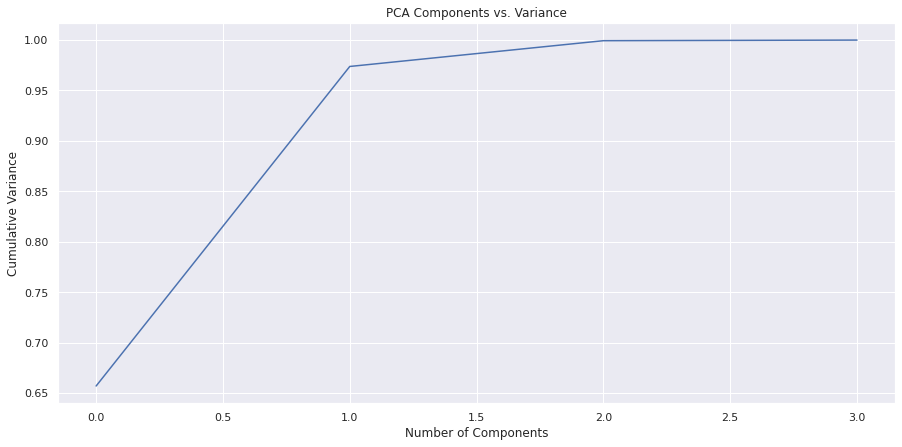

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Finding optimal number of components for dimensionality reduction
pca = PCA(n_components=None)
pca.fit(X_train_scaled)
feature_variance = pca.explained_variance_ratio_
total_variance = np.cumsum(feature_variance)  # cumulative sum

print('\nFeature Variance:\n')
print(feature_variance)
print('\nCumulative Feature Variance:\n')
print(total_variance)

plt.plot(total_variance)
plt.title('PCA Components vs. Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [ ]:
# Selecting 8 Components
pca_X = PCA(n_components=4)
X_train_pca = pca_X.fit_transform(X_train_scaled)
X_test_pca = pca_X.transform(X_test_scaled)

In [ ]:
pca_columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
X_train_pca = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca = pd.DataFrame(X_test_pca, columns=pca_columns)

In [ ]:
X_trainn = np.array(X_train_pca) #X_train_scaled
X_train= X_trainn[:, :, None]
print(X_train.shape)

X_testt = np.array(X_test_pca)#X_test_scaled
X_test = X_testt[:, :, None]
print(X_test.shape)

(3976147, 4, 1)
(994037, 4, 1)


# **3- Building The Model- Conv1D- CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D ,GlobalMaxPooling1D , Dropout
from sklearn.metrics import confusion_matrix
from keras.layers import SpatialDropout1D 

model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(Conv1D(32,2, activation="relu")) 
#feature sizenı azaltmak için bu katmanı ekledik.
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation = 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer = "sgd", metrics = ['acc'])
model.summary()


#es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=60)
#modeli eğitmek 
history = model.fit(X_train, y_train, batch_size=64, epochs=8, verbose=1,validation_data=(X_test,y_test))
#test etmek - 
score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
_,acc=model.evaluate(X_test,y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 3, 64)             192       
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 32)             4128      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


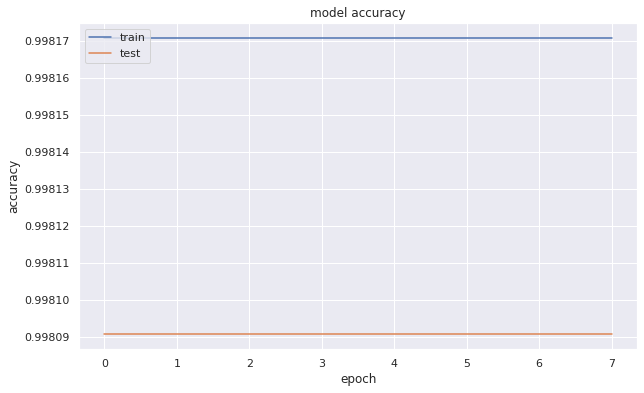

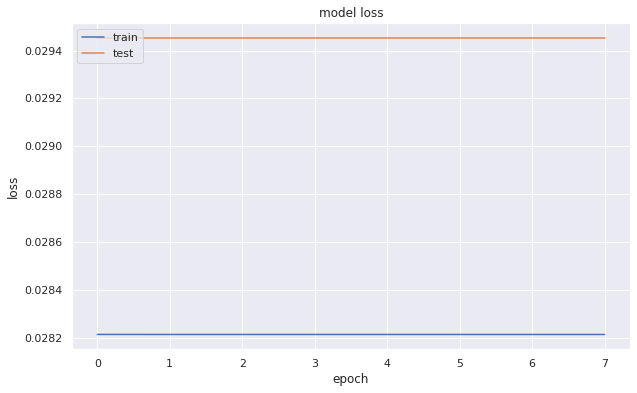

In [ ]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# plot a histogram of each variable in the dataset
def plot_variable_distributions(trainX):
	# remove overlap
	cut = int(trainX.shape[1] / 2)
	longX = trainX[:, -cut:, :]
	# flatten windows
	longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
	print(longX.shape)
	pyplot.figure()
	xaxis = None
	for i in range(longX.shape[1]):
		ax = pyplot.subplot(longX.shape[1], 1, i+1, sharex=xaxis)
		ax.set_xlim(-1, 1)
		if i == 0:
			xaxis = ax
		pyplot.hist(longX[:, i], bins=100)
	pyplot.show()
 
# load data
trainX, trainy, testX, testy = load_dataset()
# plot histograms
plot_variable_distributions(trainX)

In [ ]:
#https://towardsdatascience.com/how-to-use-convolutional-neural-networks-for-time-series-classification-56b1b0a07a57
from keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, GlobalMaxPooling1D
from keras.models import Model


#this base model is one branch of the main model. it takes a time series as an input, performs 1-D 
#convolution, and returns it as an output ready for concatenation

def get_base_model(input_len, fsize):
  #the input is a time series of length n and width 19
  input_seq = Input(shape=(input_len, 19))
  #choose the number of convolution filters
  nb_filters = 10
  #1-D convolution and global max-pooling
  convolved = Conv1D(nb_filters, fsize, padding="same", activation="tanh")(input_seq)
  processed = GlobalMaxPooling1D()(convolved)
  #dense layer with dropout regularization
  compressed = Dense(50, activation="tanh")(processed)
  compressed = Dropout(0.3)(compressed)
  model = Model(inputs=input_seq, outputs=compressed)
  return model


#this is the main model. it takes the original time series and its down-sampled versions as an input,
#and returns the result of classification as an output

#3480 lenght, 

def main_model(inputs_lens = [512, 1024, 3480], fsizes = [8,16,24]):
  #the inputs to the branches are the original time series, and its down-sampled versions
  input_smallseq = Input(shape=(inputs_lens[0], 19))
  input_medseq = Input(shape=(inputs_lens[1] , 19))
  input_origseq = Input(shape=(inputs_lens[2], 19))

  #the more down-sampled the time series, the shorter the corresponding filter
  base_net_small = get_base_model(inputs_lens[0], fsizes[0])
  base_net_med = get_base_model(inputs_lens[1], fsizes[1])
  base_net_original = get_base_model(inputs_lens[2], fsizes[2])


  embedding_small = base_net_small(input_smallseq)
  embedding_med = base_net_med(input_medseq)
  embedding_original = base_net_original(input_origseq)

  #concatenate all the outputs
  merged = Concatenate()([embedding_small, embedding_med, embedding_original])
  out = Dense(1, activation='sigmoid')(merged)

  model = Model(inputs=[input_smallseq, input_medseq, input_origseq], outputs=out)
  return model

# **3- Building The Model- RNN**

# **4- Plot Accuracy & Loss & Confusion Matrix of Model**

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


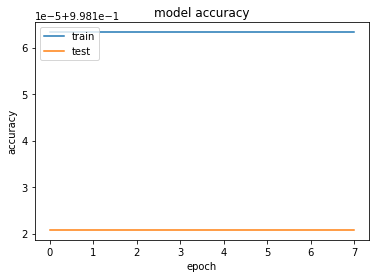

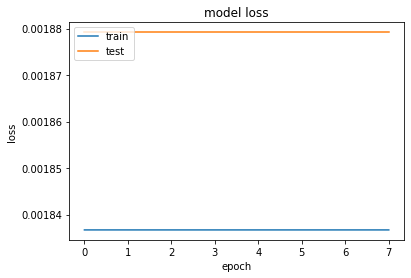

In [ ]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#confusion matrix
y_pred=model.predict(X_test,batch_size=64)
y_pred=(y_pred > 0.5)
results=confusion_matrix(y_test,y_pred)

plt.clf()
plt.imshow(results, interpolation='nearest', cmap="Wistia")
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt. yticks([])
plt. xticks([])

s = [['TN','FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(results[i][j]))
plt.show()

In [ ]:
plt.subplot(211)
print(history1.history.keys())
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('accuracy')
plt.legend( ['train','test'],loc=3,ncol=6,mode="expand",bbox_to_anchor=(0., 1.02, 1., .102), borderaxespad=0.)
plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#test sınıfı için ********************************
#prediction_X_valid=prediction_X_valid[:, 0]
#one-hot encoding şeklindeki y labelı tek boyuta indirir.
rounded_labels=np.argmax(y_valid, axis=1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(rounded_labels, prediction_X_valid)
print('Accuracy: ',accuracy)
# precision tp / (tp + fp)
precision = precision_score(rounded_labels, prediction_X_valid)
print('Precision: ',precision)
# recall: tp / (tp + fn)
recall = recall_score(rounded_labels, prediction_X_valid)
print('Recall: ',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(rounded_labels, prediction_X_valid)
print('F1 score: ',f1)

#eğitim verisi için 
rounded_train=np.argmax(y_train, axis=1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(rounded_train, prediction_X_train)
print('Accuracy: ',accuracy)
# precision tp / (tp + fp)
precision = precision_score(rounded_train, prediction_X_train)
print('Precision: ',precision)
# recall: tp / (tp + fn)
recall = recall_score(rounded_train, prediction_X_train)
print('Recall: ',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(rounded_train, prediction_X_train)
print('F1 score: ',f1)

# **5- Plot Predicted & Actual Beat**

# **6- Listen Both Beat as Audio**